<a href="https://colab.research.google.com/github/himeshps/PClubMLTask1/blob/main/MLTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#The code below is the implementation of KNN on test and train data provided in the dataset.
#This cell consists of only KNN application.


from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data=pd.read_csv('/content/drive/MyDrive/ML_Task1/Dataset/train.csv')
df=data
test_df=pd.read_csv('/content/drive/MyDrive/ML_Task1/Dataset/test.csv')
data.head(10)

data[data.columns[data.isna().sum() > 0]].isna().mean()*100

data.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Id'], inplace=True, axis=1)
data[data.columns[data.isna().sum() > 0]].isna().mean()*100

X=data.drop('SalePrice', axis=1)
y=data['SalePrice']

x_en=pd.get_dummies(X,drop_first=True)
imputer=KNNImputer()
imputer.fit(x_en)
x=imputer.transform(x_en)
x=pd.DataFrame(x, columns=x_en.columns)

x[x.columns[x.isna().sum() > 0]].isna().mean()*100
lof = LocalOutlierFactor()
yhat = lof.fit_predict(x.to_numpy())
mask=yhat!=-1
x_train=x.to_numpy()[mask, :]
x_train=pd.DataFrame(x_train, columns=x.columns)
y_train=y[mask]
print(x_train.shape, y_train.shape)

mm_scaler=MinMaxScaler()
x_scaled=pd.DataFrame(mm_scaler.fit_transform(x_train), columns=x_train.columns)
x_scaled.head()

target_scaler=MinMaxScaler()
y_data=pd.DataFrame(y_train)
target_scaler.fit(y_data)
y_scaled=target_scaler.transform(y_data)
y_scaled

#  Implemented RFE(Decision Tree Regressor) to drop the remaining features other than the 14 retained
selected_list=['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageCars', 'GarageArea', 'MoSold']
x_selected=x_scaled[selected_list]
x_selected

y = df.SalePrice
columns=selected_list
df[columns].isnull().sum()

from sklearn.impute import SimpleImputer

inputer = SimpleImputer(missing_values=np.nan, strategy='constant')
inputer = inputer.fit(df[columns].values)

inputed = inputer.transform(df[columns].values)

X = inputed

from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42)

from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=12)
model_knn.fit(train_X, train_y)

from sklearn.impute import SimpleImputer

inputer = SimpleImputer(missing_values=np.nan, strategy='constant')
inputer = inputer.fit(test_df[columns].values)

inputed = inputer.transform(test_df[columns].values)

test_X = inputed

test_preds = model_knn.predict(test_X)

test_preds

output = pd.DataFrame({'Id': test_df.Id,
                       'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(1406, 232) (1406,)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(1406, 232) (1406,)


array([ 3,  1,  2, ...,  9, 11,  1], dtype=int32)

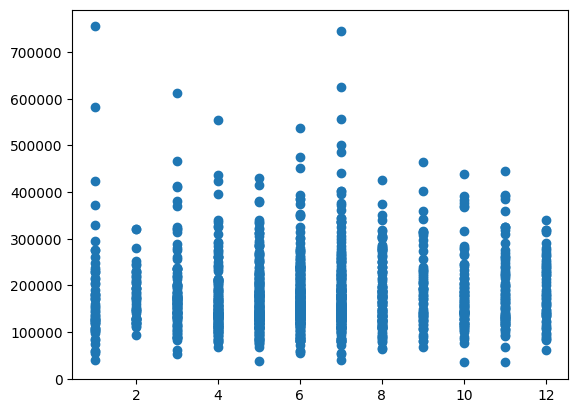

In [23]:
#This is the feature representation and clustering of Month Sold feature of the provided dataset.


from google.colab import drive
drive.mount('/content/drive')
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data=pd.read_csv('/content/drive/MyDrive/ML_Task1/Dataset/train.csv')
df=data
test_df=pd.read_csv('/content/drive/MyDrive/ML_Task1/Dataset/test.csv')
data.head(10)

data[data.columns[data.isna().sum() > 0]].isna().mean()*100

data.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Id'], inplace=True, axis=1)
data[data.columns[data.isna().sum() > 0]].isna().mean()*100

X=data.drop('SalePrice', axis=1)
y=data['SalePrice']

x_en=pd.get_dummies(X,drop_first=True)
imputer=KNNImputer()
imputer.fit(x_en)
x=imputer.transform(x_en)
x=pd.DataFrame(x, columns=x_en.columns)

x[x.columns[x.isna().sum() > 0]].isna().mean()*100
lof = LocalOutlierFactor()
yhat = lof.fit_predict(x.to_numpy())
mask=yhat!=-1
x_train=x.to_numpy()[mask, :]
x_train=pd.DataFrame(x_train, columns=x.columns)
y_train=y[mask]
print(x_train.shape, y_train.shape)

mm_scaler=MinMaxScaler()
x_scaled=pd.DataFrame(mm_scaler.fit_transform(x_train), columns=x_train.columns)
x_scaled.head()

target_scaler=MinMaxScaler()
y_data=pd.DataFrame(y_train)
target_scaler.fit(y_data)
y_scaled=target_scaler.transform(y_data)
y_scaled

#  Implemented RFE(Decision Tree Regressor) to drop the remaining features other than the 14 retained
selected_list=['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageCars', 'GarageArea', 'MoSold']
x_selected=x_scaled[selected_list]
x_selected

y = df.SalePrice
columns=selected_list
df[columns].isnull().sum()

from sklearn.impute import SimpleImputer

inputer = SimpleImputer(missing_values=np.nan, strategy='constant')
inputer = inputer.fit(df[columns].values)

inputed = inputer.transform(df[columns].values)

X = inputed

from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42)

from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=12)
model_knn.fit(train_X, train_y)

from sklearn.impute import SimpleImputer

inputer = SimpleImputer(missing_values=np.nan, strategy='constant')
inputer = inputer.fit(test_df[columns].values)

inputed = inputer.transform(test_df[columns].values)

test_X = inputed

test_preds = model_knn.predict(test_X)

test_preds

output = pd.DataFrame({'Id': test_df.Id,
                       'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)

plt.scatter(df['MoSold'],df['SalePrice'])
scaler=MinMaxScaler()
scaler.fit(df[['SalePrice']])
df[['SalePrice']]=scaler.transform(df[['SalePrice']])
scaler.fit(df[['MoSold']])
df[['MoSold']]=scaler.transform(df[['MoSold']])

km=KMeans(n_clusters=12)
yy_predicted=km.fit_predict(df[['MoSold','SalePrice']])
yy_predicted

#Clustering on MoSold data is evident as the data is already having the 12 discrete moth values

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


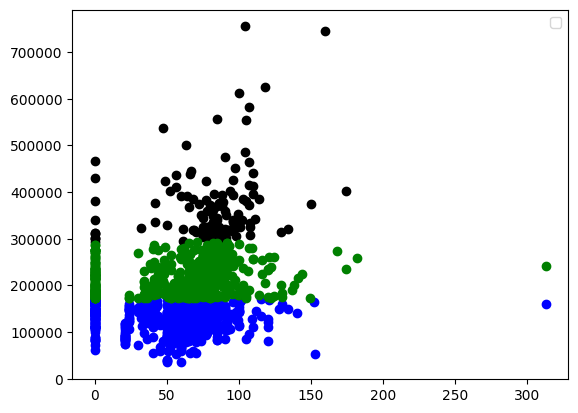

In [20]:
#This cell deals with the representation of LotFrontage feature and its respective clustering


from google.colab import drive
drive.mount('/content/drive')
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data=pd.read_csv('/content/drive/MyDrive/ML_Task1/Dataset/train.csv')
df=data
test_df=pd.read_csv('/content/drive/MyDrive/ML_Task1/Dataset/test.csv')


df['LotFrontage']=np.nan_to_num(df['LotFrontage'])




km=KMeans(n_clusters=3)
y1_predicted=km.fit_predict(df[['LotFrontage','SalePrice']])
df['cluster']=y1_predicted
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.LotFrontage,df1.SalePrice,color='blue')
plt.scatter(df2.LotFrontage,df2.SalePrice,color='black')
plt.scatter(df3.LotFrontage,df3.SalePrice,color='green')
plt.legend()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


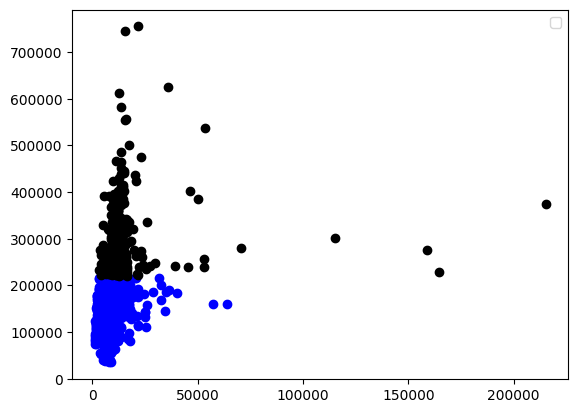

In [19]:
#This cell deals with the representation of LotArea feature and its respective clustering


from google.colab import drive
drive.mount('/content/drive')
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data=pd.read_csv('/content/drive/MyDrive/ML_Task1/Dataset/train.csv')
df=data
test_df=pd.read_csv('/content/drive/MyDrive/ML_Task1/Dataset/test.csv')


df['LotArea']=np.nan_to_num(df['LotArea'])




km=KMeans(n_clusters=2)
y2_predicted=km.fit_predict(df[['LotArea','SalePrice']])
df['cluster']=y2_predicted
df1=df[df.cluster==0]
df2=df[df.cluster==1]
plt.scatter(df1.LotArea,df1.SalePrice,color='blue')
plt.scatter(df2.LotArea,df2.SalePrice,color='black')
plt.legend()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


array([8, 7, 5, ..., 5, 2, 2], dtype=int32)

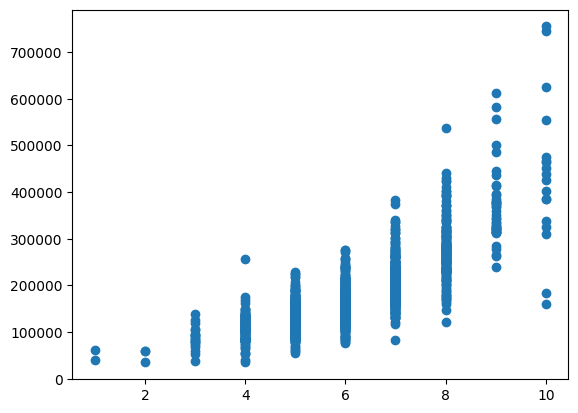

In [28]:
#This cell deals with the representation of OverallQual feature and its respective clustering


from google.colab import drive
drive.mount('/content/drive')
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data=pd.read_csv('/content/drive/MyDrive/ML_Task1/Dataset/train.csv')
df=data
test_df=pd.read_csv('/content/drive/MyDrive/ML_Task1/Dataset/test.csv')


df['OverallQual']=np.nan_to_num(df['OverallQual'])




plt.scatter(df['OverallQual'],df['SalePrice'])
scaler=MinMaxScaler()
scaler.fit(df[['SalePrice']])
df[['SalePrice']]=scaler.transform(df[['SalePrice']])
scaler.fit(df[['OverallQual']])
df[['OverallQual']]=scaler.transform(df[['OverallQual']])

km=KMeans(n_clusters=10)
yy_predicted=km.fit_predict(df[['OverallQual','SalePrice']])
yy_predicted

#In this feature it is not necessary to colour grade the clustering as array represents the quality values and the graph too.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


array([1, 0, 7, ..., 9, 3, 3], dtype=int32)

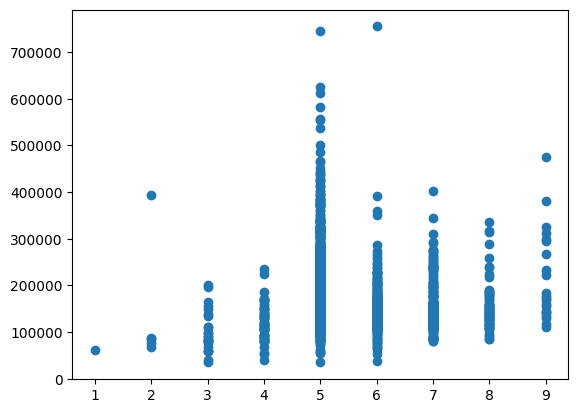

In [29]:
#This cell deals with the representation of OverallCond feature and its respective clustering


from google.colab import drive
drive.mount('/content/drive')
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data=pd.read_csv('/content/drive/MyDrive/ML_Task1/Dataset/train.csv')
df=data
test_df=pd.read_csv('/content/drive/MyDrive/ML_Task1/Dataset/test.csv')


df['OverallCond']=np.nan_to_num(df['OverallCond'])




plt.scatter(df['OverallCond'],df['SalePrice'])
scaler=MinMaxScaler()
scaler.fit(df[['SalePrice']])
df[['SalePrice']]=scaler.transform(df[['SalePrice']])
scaler.fit(df[['OverallCond']])
df[['OverallCond']]=scaler.transform(df[['OverallCond']])

km=KMeans(n_clusters=10)
yy_predicted=km.fit_predict(df[['OverallCond','SalePrice']])
yy_predicted

#This plot also represents the feature quite well without colour grading.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


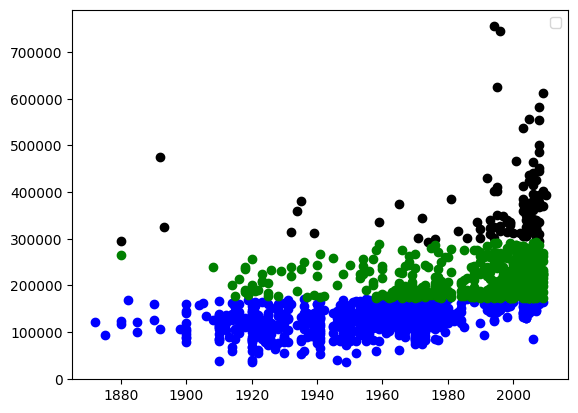

In [31]:
#This cell deals with the representation of YearBuilt feature and its respective clustering


from google.colab import drive
drive.mount('/content/drive')
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data=pd.read_csv('/content/drive/MyDrive/ML_Task1/Dataset/train.csv')
df=data
test_df=pd.read_csv('/content/drive/MyDrive/ML_Task1/Dataset/test.csv')


df['YearBuilt']=np.nan_to_num(df['YearBuilt'])




km=KMeans(n_clusters=3)
y2_predicted=km.fit_predict(df[['YearBuilt','SalePrice']])
df['cluster']=y2_predicted
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.YearBuilt,df1.SalePrice,color='blue')
plt.scatter(df2.YearBuilt,df2.SalePrice,color='black')
plt.scatter(df3.YearBuilt,df3.SalePrice,color='green')
plt.legend()

#Color Grading the clusters helps in the identification of the kind of properties, example: the black ones are the high priced recent properties etc.

#YearRemodAdd feature will also have a more or less similar plot.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


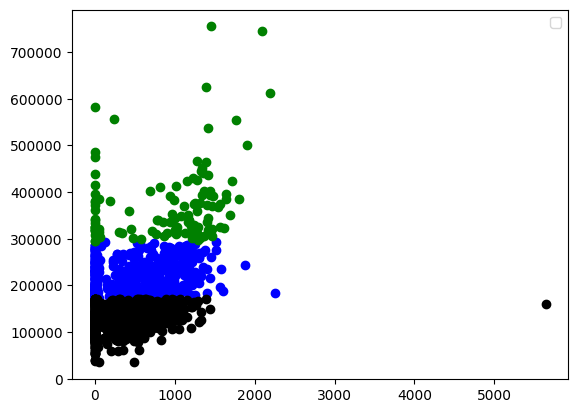

In [34]:
#This cell deals with the representation of BSMTFinSF1 feature and its respective clustering


from google.colab import drive
drive.mount('/content/drive')
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df=pd.read_csv('/content/drive/MyDrive/ML_Task1/Dataset/train.csv')




km=KMeans(n_clusters=3)
y2_predicted=km.fit_predict(df[['BsmtFinSF1','SalePrice']])
df['cluster']=y2_predicted
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.BsmtFinSF1,df1.SalePrice,color='blue')
plt.scatter(df2.BsmtFinSF1,df2.SalePrice,color='black')
plt.scatter(df3.BsmtFinSF1,df3.SalePrice,color='green')
plt.legend()

#TotalBsmtSF feature also has similar characteristics.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


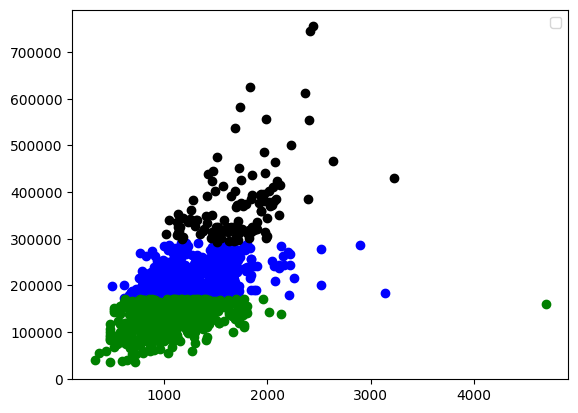

In [36]:
#This cell deals with the representation of 1stFlrSF feature and its respective clustering


from google.colab import drive
drive.mount('/content/drive')
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df=pd.read_csv('/content/drive/MyDrive/ML_Task1/Dataset/train.csv')




km=KMeans(n_clusters=3)
y2_predicted=km.fit_predict(df[['1stFlrSF','SalePrice']])
df['cluster']=y2_predicted
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1['1stFlrSF'],df1.SalePrice,color='blue')
plt.scatter(df2['1stFlrSF'],df2.SalePrice,color='black')
plt.scatter(df3['1stFlrSF'],df3.SalePrice,color='green')
plt.legend()

#2ndFlrSF feature also has similar characteristics.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


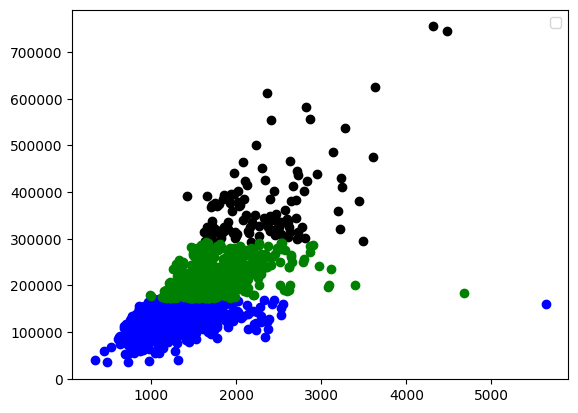

In [37]:
#This cell deals with the representation of GrLivArea feature and its respective clustering


from google.colab import drive
drive.mount('/content/drive')
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df=pd.read_csv('/content/drive/MyDrive/ML_Task1/Dataset/train.csv')




km=KMeans(n_clusters=3)
y2_predicted=km.fit_predict(df[['GrLivArea','SalePrice']])
df['cluster']=y2_predicted
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1['GrLivArea'],df1.SalePrice,color='blue')
plt.scatter(df2['GrLivArea'],df2.SalePrice,color='black')
plt.scatter(df3['GrLivArea'],df3.SalePrice,color='green')
plt.legend()

#2ndFlrSF feature also has similar characteristics.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


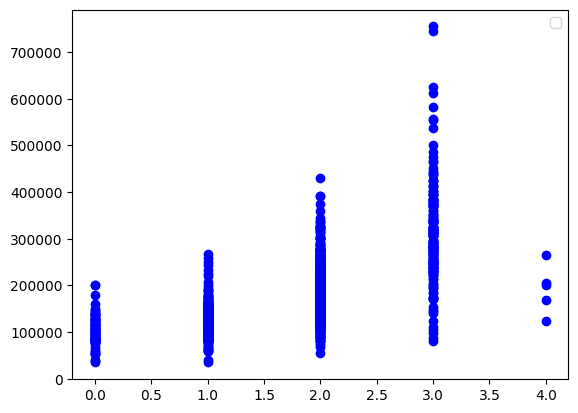

In [39]:
#This cell deals with the representation of GarageCars feature and its respective clustering


from google.colab import drive
drive.mount('/content/drive')
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df=pd.read_csv('/content/drive/MyDrive/ML_Task1/Dataset/train.csv')




km=KMeans(n_clusters=1)
y2_predicted=km.fit_predict(df[['GarageCars','SalePrice']])
df['cluster']=y2_predicted
df1=df[df.cluster==0]

plt.scatter(df1['GarageCars'],df1.SalePrice,color='blue')

plt.legend()

#GarageArea feature also has similar characteristics.
#The plot in itself is enough to represent the attributes

#At this point, I have represented all the features I had retained by employing Decision Tree Regressor methodology for the dataset.